# Creador de instancias segun Martello y Toth: Knapsack libro

In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
def generar_instancia_uncorrelated(n,v):
    weights = np.random.randint(1,v+1, size=n)
    prices = np.random.randint(1,v+1, size=n)
    return weights, prices

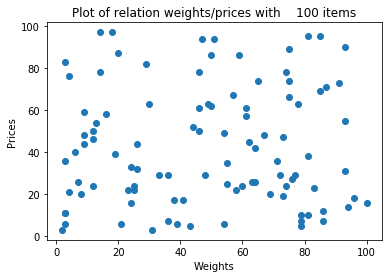

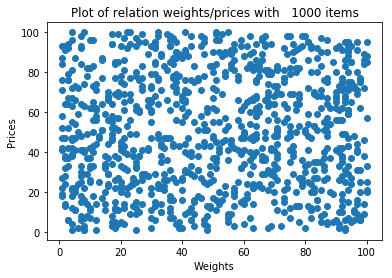

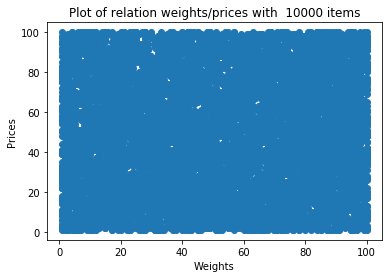

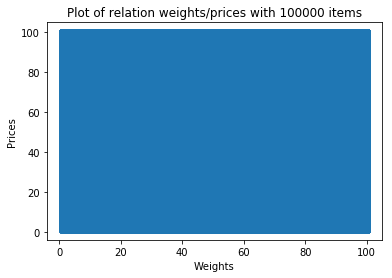

In [88]:
for i in [100,1000,10000,100000]:
    weights, prices = generar_instancia_uncorrelated(i,100)
    plt.scatter(weights,prices)
    plt.title("Plot of relation weights/prices with %6d items" %(i))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [71]:
def generar_instancia_weakly_correlated(n,v,r):
    weights = np.random.randint(1,v+1, size=n)
    prices = np.array([np.random.randint(
        weights[i] - r, weights[i] + r + 1, size = 1) 
                         for i in range(len(weights))])
    return weights, prices

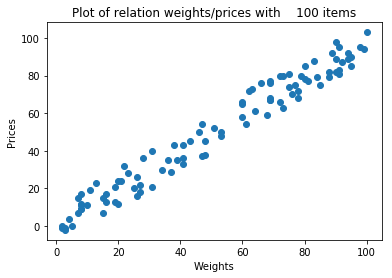

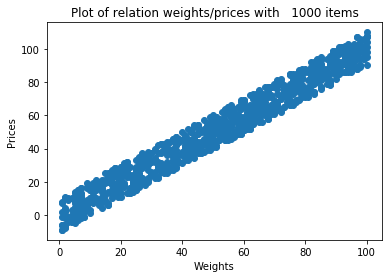

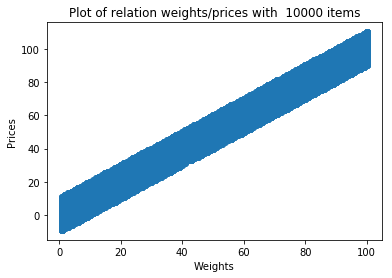

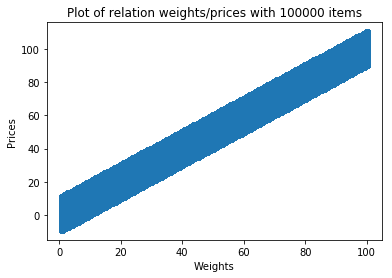

In [86]:
for i in [100,1000,10000,100000]:
    weights, prices = generar_instancia_weakly_correlated(i,100,10)
    plt.scatter(weights,prices)
    plt.title("Plot of relation weights/prices with %6d items" %(i))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [92]:
def generar_instancia_correlated(n,v,r):
    weights = np.random.randint(1,v+1, size=n)
    prices = np.array([weights[i] + r 
                         for i in range(len(weights))])
    return weights, prices

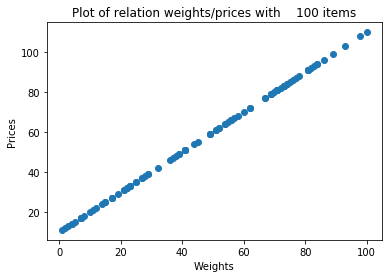

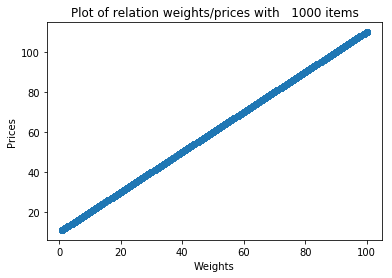

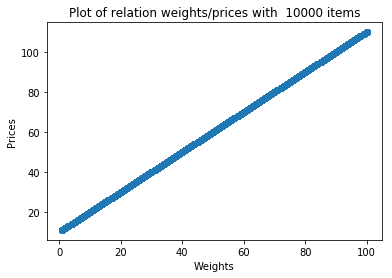

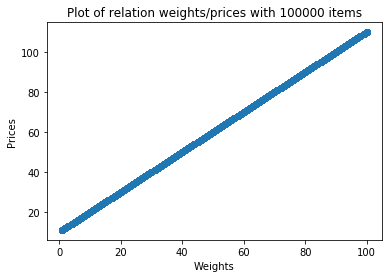

In [93]:
for i in [100,1000,10000,100000]:
    weights, prices = generar_instancia_correlated(i,100,10)
    plt.scatter(weights,prices)
    plt.title("Plot of relation weights/prices with %6d items" %(i))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()

In [97]:
import math

def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)

def pearson_def(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [106]:
for func in [generar_instancia_uncorrelated,
             generar_instancia_weakly_correlated,
             generar_instancia_correlated]:
    pearsons =[]
    for i in range(10):
        if func == generar_instancia_uncorrelated:
            weights, prices = func(100,100)
        else:
            weights, prices = func(100,100,10)
        temp = pearson_def(weights, prices)
        pearsons.append(temp)
        #print(temp)
    print(str(func),"Prom:",sum(pearsons)/float(len(pearsons)))

<function generar_instancia_uncorrelated at 0x105059ae8> Prom: -0.03174184035917482
<function generar_instancia_weakly_correlated at 0x105059b70> Prom: [0.97848618]
<function generar_instancia_correlated at 0x1013d4950> Prom: 1.0


# Creación de instancias según NORTA

In [107]:
from scipy.stats import norm
def gen_instances_from_NORTA(m,n,R,v,r):
    """
    m: dimensiones
    n: número de muestras
    R: matriz de correlaciones deseada
    weights \in [1,v]
    prices \in [r,v+r]
    """
    L = np.linalg.cholesky(R) #lower
    W = np.random.normal(0, 1, (m,n))
    Z = np.dot(L,W)
    X = np.empty([m, n])
    #print(np.shape(X))
    for i in range(n):
            X[0,i] = int(float(v-1)*norm.cdf(Z[0,i])+float(1.0))
            X[1,i] = int(float(v)*norm.cdf(Z[1,i])+float(r))
    return X

Correlation Matriz:
 [[1, 0.1], [0.1, 1]]


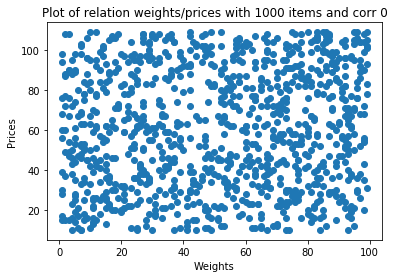

Correlation Matriz:
 [[1, 0.5], [0.5, 1]]


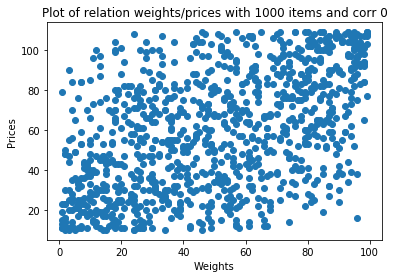

Correlation Matriz:
 [[1, 0.7], [0.7, 1]]


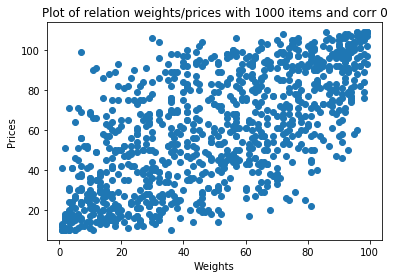

Correlation Matriz:
 [[1, 0.9], [0.9, 1]]


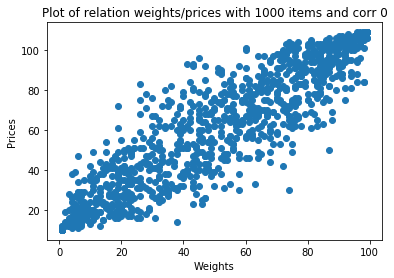

Correlation Matriz:
 [[1, 0.99], [0.99, 1]]


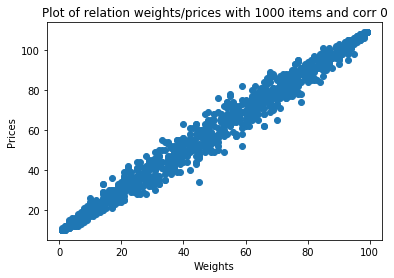

Correlation Matriz:
 [[1, 0.999999999], [0.999999999, 1]]


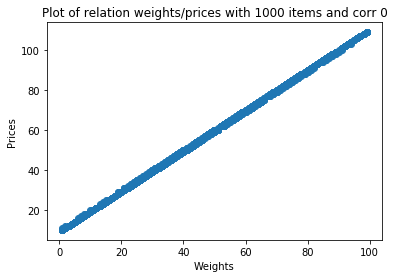

In [109]:
for corr in [0.1,0.5,0.7,0.9,0.99,0.999999999]: #corr: Correlación deseada
    R = [[1, corr],[corr, 1]]
    print("Correlation Matriz:\n",R)
    Z = gen_instances_from_NORTA(2,1000,R,100,10)
    plt.scatter(Z[0,:],Z[1,:])
    plt.title("Plot of relation weights/prices with 1000 items and corr %d" %(corr))
    plt.xlabel("Weights")
    plt.ylabel("Prices")
    plt.show()